# Customer Churn Analysis


#### Goal 1: Identify the churn rate across different contract types.

#### Goal 2: Determine if monthly charges correlate with customer loss.

#### Goal 3: Clean missing values (specifically in the 'TotalCharges' column).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Basic Inspection
print(df.info())

# 2. Cleaning: Convert TotalCharges to numeric (it often imports as a string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 3. Quick Insight: Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Overall Churn Rate: {churn_rate['Yes']:.2f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


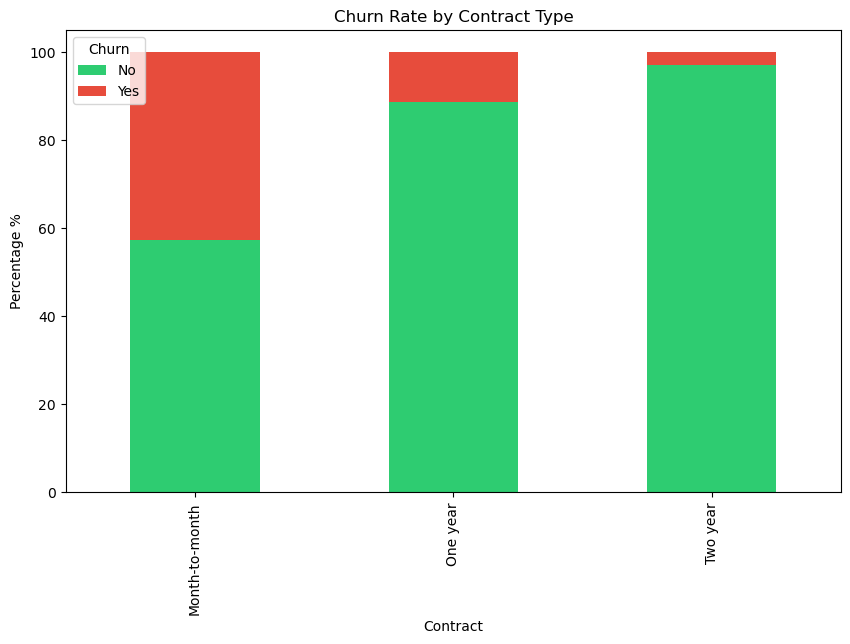

In [2]:
# Grouping by Contract and Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

# Plotting
contract_churn.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], figsize=(10, 6))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage %')
plt.show()

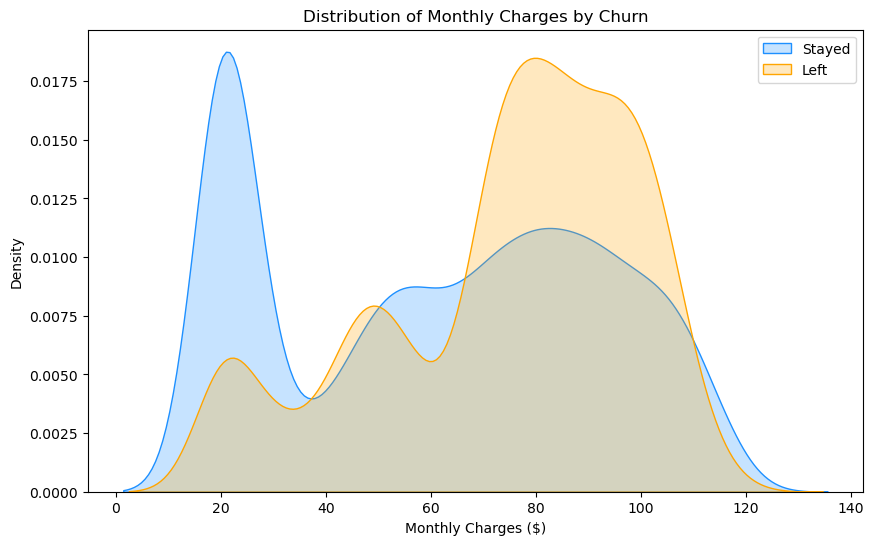

In [4]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='Stayed', fill=True, color="dodgerblue")
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Left', fill=True, color="orange")
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges ($)')
plt.legend()
plt.show()

Observations

Insight 1: Customers on "Month-to-Month" contracts have a significantly higher churn rate compared to One or Two-year contracts.

Insight 2: There is a "churn spike" for customers paying between \\\$70 - $100 per month.